In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# cars.csv 불러오기
cars = pd.read_csv('cars.csv')
cars

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [3]:
# brands.csv 불러오기
brand = pd.read_csv('brand.csv')
brand

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States
5,volvo,Sweden
6,peugeot,France
7,bmw,Germany
8,citroen,France
9,mercedes-benz,Germany


# cars.csv와 brand.csv의 데이터 합치기

In [4]:
# cars의 title에서 brand 이름 추출하여 'brand'로 저장
cars['brand'] = cars['title'].str.split().apply(lambda x: x[0])

In [5]:
# 'brand' 소문자 변환
cars['brand'] = cars['brand'].str.lower()

In [6]:
# 'brand' 기준으로 하여, cars에 brand를 붙여서(left join) cars_df로 저장하기
cars_df = cars.merge(brand, left_on = 'brand', right_on = 'title', how = 'outer')
cars_df.drop('title_y', axis=1, inplace=True)
cars_df = cars_df.rename({'title_x': 'title'}, axis = 1)
cars_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic
1,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic
2,SKODA FABIA,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,skoda,Czech Republic
3,SKODA FABIA,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN,skoda,Czech Republic
4,SKODA FABIA,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN,skoda,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MASERATI QUATTROPORTE,10000,72000,2009,3.0,Petrol,Saloon,4.2L,Automatic,4.0,5.0,Euro 4,Full,maserati,Italy
3683,SSANGYONG KORANDO,12995,42771,2018,2.0,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,NaN,ssangyong,South Korea
3684,SSANGYONG KORANDO,4277,82400,2013,NaN,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 5,Full,ssangyong,South Korea
3685,LAGONDA LG6 ROADSTER,14995,84000,1953,NaN,Petrol,Saloon,2.6L,Manual,4.0,NaN,NaN,NaN,lagonda,United Kingdom


# 카테고리형 변수를 숫자 형태로 변환하기

In [7]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 460.9+ KB


## Engine 숫자 형태로 변환하기

In [8]:
cars_df['Engine']

0       1.4L
1       1.4L
2       1.9L
3       1.4L
4       1.2L
        ... 
3682    4.2L
3683    2.2L
3684    2.0L
3685    2.6L
3686     NaN
Name: Engine, Length: 3687, dtype: object

In [9]:
cars_df['Engine'] = cars_df['Engine'].str[:-1]

In [10]:
cars_df['Engine'].astype('float')

0       1.4
1       1.4
2       1.9
3       1.4
4       1.2
       ... 
3682    4.2
3683    2.2
3684    2.0
3685    2.6
3686    NaN
Name: Engine, Length: 3687, dtype: float64

## Emission Class 숫자 형태로 변환하기

In [11]:
cars_df['Emission Class']

0       Euro 6
1       Euro 6
2       Euro 4
3       Euro 4
4       Euro 5
         ...  
3682    Euro 4
3683    Euro 6
3684    Euro 5
3685       NaN
3686       NaN
Name: Emission Class, Length: 3687, dtype: object

In [12]:
cars_df['Emission Class'] = cars_df['Emission Class'].str[-1]
cars_df['Emission Class'].astype('float')

0       6.0
1       6.0
2       4.0
3       4.0
4       5.0
       ... 
3682    4.0
3683    6.0
3684    5.0
3685    NaN
3686    NaN
Name: Emission Class, Length: 3687, dtype: float64

# 결측치 처리하기

In [13]:
cars_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.853539
brand                0.000000
country              0.000000
dtype: float64

In [14]:
cars_df = cars_df.dropna(subset = ['Engine'])

In [15]:
cars_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.377814
Fuel type            0.000000
Body type            0.000000
Engine               0.000000
Gearbox              0.000000
Doors                0.004119
Seats                0.006864
Emission Class       0.011807
Service history      0.852554
brand                0.000000
country              0.000000
dtype: float64

In [16]:
cars_df[cars_df['Doors'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
160,VAUXHALL ASTRA,3950,56800,2015,4.0,Diesel,Hatchback,1.7,Manual,NaN,5.0,NaN,NaN,vauxhall,United Kingdom
1599,BMW 3 SERIES,4000,94000,2007,2.0,Petrol,Saloon,2.5,Automatic,NaN,NaN,NaN,NaN,bmw,Germany
2153,VOLKSWAGEN POLO,6700,49600,2012,NaN,Petrol,Hatchback,1.2,Automatic,NaN,NaN,NaN,NaN,volkswagen,Germany
2177,VOLKSWAGEN POLO,6450,53193,2011,NaN,Petrol,Hatchback,1.2,Automatic,NaN,5.0,NaN,NaN,volkswagen,Germany
2188,VOLKSWAGEN POLO,6900,35515,2012,NaN,Petrol,Hatchback,1.2,Automatic,NaN,5.0,NaN,NaN,volkswagen,Germany
2214,VOLKSWAGEN GOLF,1895,61000,2001,5.0,Petrol,Hatchback,1.6,Automatic,NaN,5.0,NaN,NaN,volkswagen,Germany
2405,HONDA JAZZ,6750,33000,2013,NaN,Petrol Hybrid,Hatchback,1.5,Automatic,NaN,5.0,NaN,NaN,honda,Japan
2445,HONDA FIT,4450,79208,2010,1.0,Petrol,Hatchback,1.3,Automatic,NaN,5.0,NaN,NaN,honda,Japan
2595,TOYOTA PRIUS,6350,72000,2012,1.0,Petrol Hybrid,Hatchback,1.8,Automatic,NaN,5.0,NaN,NaN,toyota,Japan
2749,NISSAN LAFESTA,3900,37000,2012,NaN,Petrol,MPV,2.0,Automatic,NaN,NaN,NaN,NaN,nissan,Japan


In [17]:
cars_df = cars_df.dropna(subset = ['Doors'])

In [18]:
cars_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.377723
Fuel type            0.000000
Body type            0.000000
Engine               0.000000
Gearbox              0.000000
Doors                0.000000
Seats                0.005514
Emission Class       0.007720
Service history      0.852219
brand                0.000000
country              0.000000
dtype: float64

In [19]:
cars_df = cars_df.dropna(subset = ['Seats'])

In [20]:
cars_df = cars_df.dropna(subset = ['Emission Class'])

In [21]:
cars_df['Previous Owners'] = cars_df['Previous Owners'].fillna(cars_df['Previous Owners'].median())

In [22]:
cars_df['Service history'] = cars_df['Service history'].fillna('Unknown')

In [23]:
cars_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
1,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
2,SKODA FABIA,1990,150000,2007,2.0,Diesel,Hatchback,1.9,Manual,5.0,5.0,4,Full,skoda,Czech Republic
3,SKODA FABIA,1995,84000,2008,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,4,Unknown,skoda,Czech Republic
4,SKODA FABIA,2495,124138,2011,3.0,Petrol,Hatchback,1.2,Automatic,5.0,5.0,5,Unknown,skoda,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,MASERATI GRANTURISMO,16000,66000,2008,3.0,Petrol,Coupe,4.2,Automatic,2.0,4.0,4,Full,maserati,Italy
3681,MASERATI GHIBLI,13900,63000,2014,5.0,Diesel,Saloon,3.0,Automatic,4.0,5.0,5,Unknown,maserati,Italy
3682,MASERATI QUATTROPORTE,10000,72000,2009,3.0,Petrol,Saloon,4.2,Automatic,4.0,5.0,4,Full,maserati,Italy
3683,SSANGYONG KORANDO,12995,42771,2018,2.0,Diesel,SUV,2.2,Automatic,5.0,5.0,6,Unknown,ssangyong,South Korea


# One hot encoding

In [24]:
cars_df_one = pd.get_dummies(cars_df, columns = ['Fuel type', 'Body type', 'Gearbox', 'Service history', 'brand', 'country'], drop_first = True)

In [25]:
cars_df_one

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel Hybrid,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,SKODA FABIA,6900,70189,2016,3.0,1.4,5.0,5.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,SKODA FABIA,6900,70189,2016,3.0,1.4,5.0,5.0,6,0,...,0,0,0,0,0,0,0,0,0,0
2,SKODA FABIA,1990,150000,2007,2.0,1.9,5.0,5.0,4,0,...,0,0,0,0,0,0,0,0,0,0
3,SKODA FABIA,1995,84000,2008,3.0,1.4,5.0,5.0,4,0,...,0,0,0,0,0,0,0,0,0,0
4,SKODA FABIA,2495,124138,2011,3.0,1.2,5.0,5.0,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,MASERATI GRANTURISMO,16000,66000,2008,3.0,4.2,2.0,4.0,4,0,...,0,1,0,0,0,0,0,0,0,0
3681,MASERATI GHIBLI,13900,63000,2014,5.0,3.0,4.0,5.0,5,0,...,0,1,0,0,0,0,0,0,0,0
3682,MASERATI QUATTROPORTE,10000,72000,2009,3.0,4.2,4.0,5.0,4,0,...,0,1,0,0,0,0,0,0,0,0
3683,SSANGYONG KORANDO,12995,42771,2018,2.0,2.2,5.0,5.0,6,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
cars_df[['Fuel type', 'Body type', 'Gearbox', 'Service history', 'brand', 'country']].nunique()

Fuel type           5
Body type           9
Gearbox             2
Service history     2
brand              45
country            12
dtype: int64

# Scaling

In [27]:
card_df_one = cars_df_one.drop('title', axis=1, inplace=True)

In [28]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [29]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [30]:
ss_df = ss.fit_transform(cars_df_one)
ss_df

array([[ 0.2454698 , -0.2863775 ,  0.85352188, ..., -0.11261972,
        -0.49973906, -0.37211075],
       [ 0.2454698 , -0.2863775 ,  0.85352188, ..., -0.11261972,
        -0.49973906, -0.37211075],
       [-0.84215158,  1.73232175, -1.04497427, ..., -0.11261972,
        -0.49973906, -0.37211075],
       ...,
       [ 0.9321554 , -0.24057098, -0.62308624, ..., -0.11261972,
        -0.49973906, -0.37211075],
       [ 1.59558229, -0.97987459,  1.27540991, ..., -0.11261972,
        -0.49973906, -0.37211075],
       [-0.33555482,  0.02248138,  0.22068983, ..., -0.11261972,
        -0.49973906, -0.37211075]])

In [31]:
rs_df = rs.fit_transform(cars_df_one)
rs_df

array([[ 0.52659285, -0.21275073,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.52659285, -0.21275073,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.36467598,  1.51794427, -0.625     , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.0893084 , -0.17347935, -0.375     , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.63296424, -0.80730782,  0.75      , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05046288,  0.0520438 ,  0.125     , ...,  0.        ,
         0.        ,  0.        ]])

In [32]:
mm_df = mm.fit_transform(cars_df_one)
mm_df

array([[0.19402985, 0.06322679, 0.76666667, ..., 0.        , 0.        ,
        0.        ],
       [0.19402985, 0.06322679, 0.76666667, ..., 0.        , 0.        ,
        0.        ],
       [0.04746269, 0.13512218, 0.46666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.28656716, 0.06485818, 0.53333333, ..., 0.        , 0.        ,
        0.        ],
       [0.37597015, 0.0385281 , 0.83333333, ..., 0.        , 0.        ,
        0.        ],
       [0.11573134, 0.07422671, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

# PCA

## ss

In [33]:
# PCA 불러오기  
from sklearn.decomposition import PCA

# PCA 적용
pca = PCA().fit(ss_df)

In [34]:
## Explained Variance Ratio(explained_variance_ratio)와 누적분포를 계산
# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_ # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # cumsum: 각 원소의 누적합을 계산하는 함수

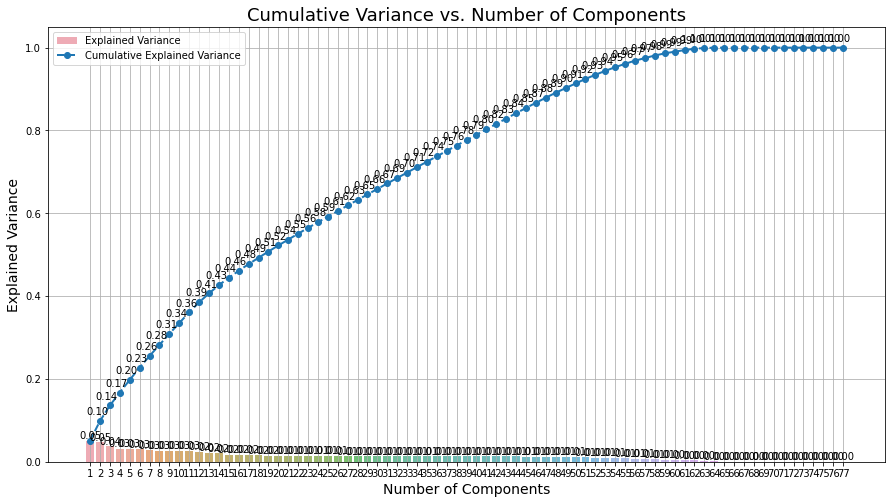

In [35]:
import matplotlib.pyplot as plt 
## 시각화
plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [39]:
## 엘보우 포인트 = 60개
# 60개의 주성분을 유지하는 PCA 선언 
pca = PCA(n_components=60)

# 기존 data를 pca에 fit_transform
data_sspca = pca.fit_transform(ss_df)

# 압축된 데이터 셋 생성
data_sspca = pd.DataFrame(data_sspca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

data_sspca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,-1.156263,1.053804,-0.378683,-0.501676,-0.181356,0.026567,-0.030773,-0.034477,0.351398,0.009152,...,0.901115,-0.850896,0.063701,0.435741,0.423481,0.029730,0.036385,-0.140801,-0.222950,-0.063056
1,-1.156263,1.053804,-0.378683,-0.501676,-0.181356,0.026567,-0.030773,-0.034477,0.351398,0.009152,...,0.901115,-0.850896,0.063701,0.435741,0.423481,0.029730,0.036385,-0.140801,-0.222950,-0.063056
2,0.323890,-1.107521,-1.158065,-0.512995,-0.191096,-0.111021,0.030143,0.089043,0.172974,0.027221,...,-1.822835,-1.675390,0.313768,0.754694,0.152692,0.080577,0.228044,0.028430,0.214649,0.086112
3,-0.695969,-1.520428,-0.464140,-0.199526,-0.120878,0.009454,-0.028116,0.258122,0.066662,0.151949,...,0.171322,-0.225786,0.186214,-0.707274,-0.264480,-0.197867,0.362734,0.282636,0.640999,0.151661
4,-0.198690,-0.717256,-0.446886,-0.306447,-0.130342,-0.090192,-0.081782,0.159281,0.201418,0.112020,...,0.117241,-0.386817,0.406853,-1.209026,0.313690,1.098073,1.032141,1.485075,-0.689607,-0.179052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,5.119609,0.479479,4.273910,2.297418,-0.856773,0.814607,2.112903,-2.692127,-0.362341,-1.296326,...,2.352975,0.385148,1.794361,1.271168,-0.906002,1.851098,-0.179506,-0.294452,2.014283,-0.297310
3589,4.128833,1.223419,1.880868,1.369642,-0.721141,1.004416,1.871085,-2.543172,-0.155621,-1.288191,...,4.096925,0.082369,0.108844,1.680727,-0.260856,0.691340,-0.524599,0.527211,0.631584,-1.243604
3590,4.928690,0.252899,1.794744,1.571638,-0.547681,0.665734,1.965471,-2.586989,-0.243357,-1.281555,...,1.462486,0.061779,-0.236119,1.108960,-1.197006,0.752140,-0.472128,0.900202,1.200757,-0.345475
3591,0.563829,4.674239,-2.164584,1.402184,0.627272,0.140789,5.014858,1.828669,-2.404813,-0.056321,...,4.456922,2.086940,0.954199,0.499721,-1.104587,-0.055686,-1.419004,0.589541,0.665004,0.281266


## rs

In [40]:
# PCA 불러오기  
from sklearn.decomposition import PCA

# PCA 적용
pca = PCA().fit(rs_df)

In [41]:
## Explained Variance Ratio(explained_variance_ratio)와 누적분포를 계산
# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_ # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # cumsum: 각 원소의 누적합을 계산하는 함수

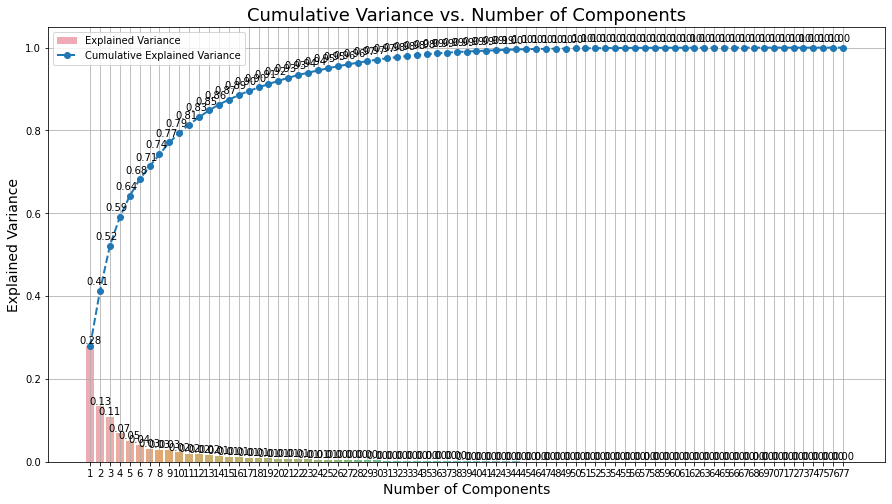

In [42]:
import matplotlib.pyplot as plt 
## 시각화
plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [47]:
## 엘보우 포인트 = 35개
# 35개의 주성분을 유지하는 PCA 선언 
pca = PCA(n_components=35)

# 기존 data를 pca에 fit_transform
data_rspca = pca.fit_transform(rs_df)

# 압축된 데이터 셋 생성
data_rspca = pd.DataFrame(data_rspca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

data_rspca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
0,-0.439348,-0.391649,-0.366469,-0.612937,0.354432,0.082130,0.030395,-0.012193,-0.316309,0.411319,...,0.020040,0.112934,0.022235,0.039817,-0.021216,0.006863,0.484825,0.798974,-0.306038,0.013243
1,-0.439348,-0.391649,-0.366469,-0.612937,0.354432,0.082130,0.030395,-0.012193,-0.316309,0.411319,...,0.020040,0.112934,0.022235,0.039817,-0.021216,0.006863,0.484825,0.798974,-0.306038,0.013243
2,0.504161,1.117083,1.657612,-0.359645,0.287952,0.133737,0.026168,0.095538,-0.231511,0.401336,...,-0.023559,0.118838,-0.029120,0.051365,-0.035791,0.039179,0.448273,0.823988,-0.293382,-0.040027
3,0.564267,-0.569425,0.741084,-0.082699,-0.270001,-0.266205,0.065987,-0.162539,0.119359,0.231061,...,-0.000003,0.098399,0.023873,0.086982,-0.039977,-0.009358,0.486028,0.814315,-0.301330,-0.122104
4,0.574244,-0.273524,0.778782,-0.373572,0.610075,0.005453,-0.014587,-0.126061,0.323684,0.281899,...,0.040556,0.104535,0.078365,-0.005306,-0.040184,0.019805,0.464743,0.842556,-0.284139,-0.051636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,0.279906,3.159531,-2.026728,2.222315,-1.227995,0.145635,0.715849,1.213987,-0.358741,0.468026,...,-0.019173,0.180196,-0.052748,0.669108,-0.307845,0.123056,-0.111692,0.126962,-0.036708,0.024402
3589,1.153969,1.495632,-3.010668,0.084400,-0.529854,0.047901,0.363450,0.408688,-0.281335,0.363573,...,-0.070807,0.111290,-0.163508,0.171525,-0.098656,0.050081,-0.083004,0.023495,-0.047190,-0.116088
3590,0.703606,3.256305,-1.405526,0.996564,-1.825194,0.034168,0.789827,0.672602,-0.242814,0.575608,...,-0.170907,0.067471,-0.209004,0.210999,-0.092836,0.047423,-0.109562,0.034271,-0.128499,-0.184931
3591,-1.681354,1.304417,-1.259396,-0.298864,-0.493751,-0.117760,-0.106505,0.549401,-0.214244,-0.006531,...,-0.062023,0.059920,0.029186,-0.090260,0.030022,-0.005041,0.003680,-0.026910,-0.031820,-0.010155


## mm

In [44]:
# PCA 불러오기  
from sklearn.decomposition import PCA

# PCA 적용
pca = PCA().fit(mm_df)

In [45]:
## Explained Variance Ratio(explained_variance_ratio)와 누적분포를 계산
# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_ # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # cumsum: 각 원소의 누적합을 계산하는 함수

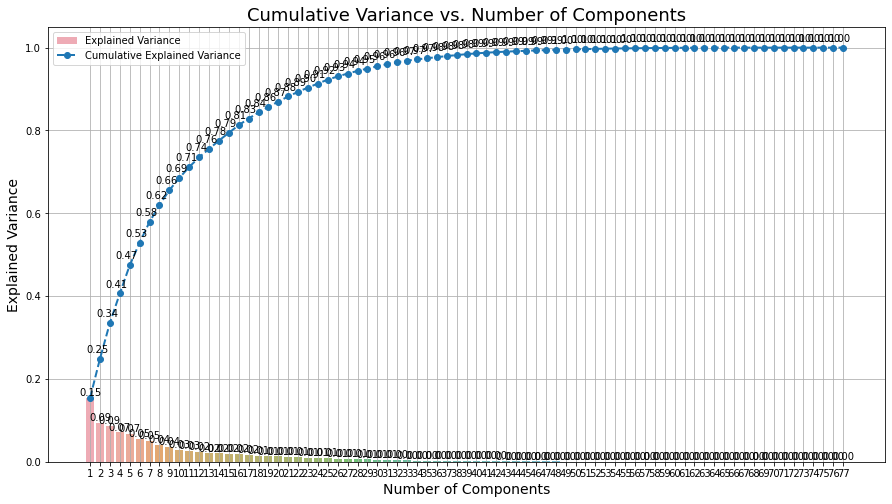

In [46]:
import matplotlib.pyplot as plt 
## 시각화
plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [48]:
## 엘보우 포인트 = 40개
# 40개의 주성분을 유지하는 PCA 선언 
pca = PCA(n_components=40)

# 기존 data를 pca에 fit_transform
data_mmpca = pca.fit_transform(mm_df)

# 압축된 데이터 셋 생성
data_mmpca = pd.DataFrame(data_mmpca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

data_mmpca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-0.080662,-0.252515,0.200611,-0.410779,-0.156284,-0.659124,-0.038960,-0.117535,0.066484,0.309719,...,0.104092,-0.012193,-0.037321,-0.026145,-0.062074,-0.057627,0.017085,-0.016410,-0.005659,-0.033074
1,-0.080662,-0.252515,0.200611,-0.410779,-0.156284,-0.659124,-0.038960,-0.117535,0.066484,0.309719,...,0.104092,-0.012193,-0.037321,-0.026145,-0.062074,-0.057627,0.017085,-0.016410,-0.005659,-0.033074
2,-0.059321,-0.266042,0.168413,-0.353584,-0.067625,-0.513427,0.387973,0.374145,0.671602,0.124062,...,0.183271,-0.006298,-0.040625,-0.023028,-0.071393,-0.034188,0.015682,-0.015184,-0.016084,0.025224
3,-0.487884,-0.193119,-0.183475,0.133521,-0.122890,-0.090552,-0.013174,-0.070340,-0.222066,0.034414,...,0.159095,0.016785,-0.031214,-0.022474,-0.096820,-0.012807,0.029821,-0.015944,-0.024759,0.030598
4,-0.151193,-0.061604,-0.287321,0.176630,-0.041901,-0.010730,-0.338516,0.620938,-0.442655,0.344876,...,0.169648,0.008922,-0.079470,-0.010526,-0.050191,-0.061467,0.027874,-0.026509,-0.029988,-0.078860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,0.564472,0.283084,-0.343975,0.472443,0.136424,1.037303,-0.055869,0.564016,0.974140,0.611178,...,-0.139085,-0.010751,-0.043111,0.035086,0.032364,0.090679,-0.206450,0.387750,-0.084260,0.104924
3589,1.049227,0.155461,0.185667,-0.156039,0.102924,0.146331,-0.704552,0.133410,0.199884,0.206664,...,-0.148494,-0.004729,-0.088891,-0.043554,0.056936,0.072740,-0.241278,0.366274,-0.086103,-0.036199
3590,0.689049,0.203579,-0.166323,0.365347,0.213505,0.803381,-0.063081,0.738317,0.480743,-0.086514,...,-0.036791,-0.005970,-0.063586,0.004895,0.026194,0.122919,-0.210740,0.392432,-0.073464,-0.048449
3591,0.961792,-0.096705,0.815198,-0.097228,0.299528,0.113348,0.073215,0.202063,-0.535864,0.986900,...,0.064289,-0.034933,-0.108997,-0.028580,0.087123,-0.068229,-0.008116,0.010163,-0.043174,-0.044981


# 분석 결과

### Standard scaling을 적용한 데이터로 pca모델을 구현해본 결과, elbow point가 약 60개로 나타났다.

### Robust scaling을 적용한 데이터로 pca모델을 구현해본 결과, elbow point가 약 45개로 나타났다.

### Min-max scaling을 적용한 데이터로 pca모델을 구현해본 결과, elbow 

# 국가별 총 브랜드 개수 구하기

In [55]:
pd.DataFrame(cars_df.groupby('country')['brand'].count())

,brand
country,
Czech Republic,63
France,518
Germany,842
Italy,127
Japan,590
Malaysia,2
Romania,14
South Korea,178
Spain,59


# 상관관계가 높은 변수의 유무 확인하기

In [50]:
cars_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
1,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
2,SKODA FABIA,1990,150000,2007,2.0,Diesel,Hatchback,1.9,Manual,5.0,5.0,4,Full,skoda,Czech Republic
3,SKODA FABIA,1995,84000,2008,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,4,Unknown,skoda,Czech Republic
4,SKODA FABIA,2495,124138,2011,3.0,Petrol,Hatchback,1.2,Automatic,5.0,5.0,5,Unknown,skoda,Czech Republic


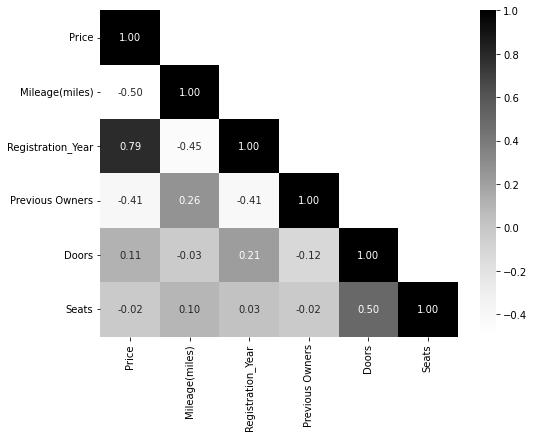

In [51]:
# 시각화 라이브러리 불러오기
import seaborn as sns  

# 'CustomerID' 열을 제외(drop)하고 상관 관계 행렬 계산(corr())
corr = cars_df.drop(columns=['title','Fuel type','Body type','Gearbox','Service history','brand','country']).corr()

# 행렬이 대각선을 기준으로 대칭이기 때문에 하단만 표시하기 위한 마스크 생성
mask = np.zeros_like(corr) # np.zeros_like()는 0으로 가득찬 array 생성, 크기는 corr와 동일   
mask[np.triu_indices_from(mask, k=1)] = True # array의 대각선 영역과 그 윗 부분에 True가 들어가도록 설정

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='Greys', annot=True, fmt='.2f')
plt.show()

### 'Registration Year'와 'Price' 사이에는 높은 상관관계가 있다.

# 회고

잘한 점 : Scaling을 하는 방법과 이유를 잘 이해하고 프로젝트 진행하였다.

못한 점 : 시간 분배를 잘 하지 못하여 더 깊은 탐구를 하지 못하였다.
    
보완할 점 : Data Cleaning 단계의 판단이나, python의 function들을 더 자연스럽게 떠올릴 수 있게 익혀야할 것 같다.
    사소한 부분에서 고민하느라 시간을 많이 사용했다.
    
느낀 점 : 깔끔하게 정제된 주어진 데이터로 PCA 모델을 배울 때에는 그리 어렵지 않았는데 데이터 양도 많고 깔끔하지 않은 데이터를 처음부터 정제하여 모델에 대입하고자하니 굉장히 어려웠고 결과도 만족스럽지 못했다. 데이터 정제의 중요성을 깨달았다. 또한 내가 필요한 정보와 그 목표를 위해 고려해야할 요소들을 아는 것도 굉장히 중요하다고 느꼈다. 데이터 분석에 있어 도메인 지식 또한 무시할 수 없다는 생각이 들었다.